# Manage The Wine Quality

## Data source:
- https://www.kaggle.com/rajyellow46/wine-quality

### Importing Libraries and Preprocessing Data

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

#Libraries for data processing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Libraries for decision tree and random forest model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#For performing hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

#Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
!pip install bioinfokit

In [3]:
# import wine data
wine = pd.read_csv('winequalityN.csv')
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Encode the Label of wine type
le = LabelEncoder()
wine.type = le.fit_transform(wine.type)

In [5]:
wine = wine.dropna()
wine.type.value_counts()

1    4870
0    1593
Name: type, dtype: int64

In [6]:
# Create a binary quality:
# For quality of 6 or more, it is in the category of good(1)
# For quality of 5 or lower, it is in the category of not good(0)
wine['quality2'] = np.where(wine['quality']>= 6, 1, 0)
wine.tail(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality2
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0
6496,0,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,1


## Distribution

In [37]:
X = wine.drop('quality', axis=1)
y = wine.quality
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [38]:
values_distribution = pd.DataFrame(y.value_counts())
values_distribution

,quality
6,2820
5,2128
7,1074
4,214
8,192
3,30
9,5


Text(0.5, 1.0, 'Wine Quality Distribution')

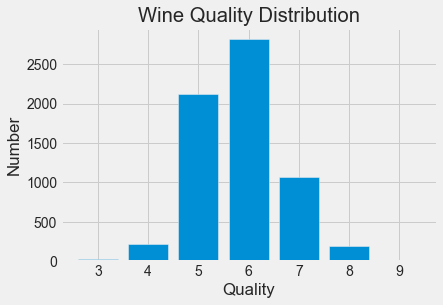

In [39]:
plt.bar(values_distribution.index, values_distribution.quality)
plt.xlabel("Quality")
plt.ylabel("Number")
plt.title("Wine Quality Distribution")

In [40]:
type_distribution = pd.DataFrame(X.type.value_counts())
type_distribution

,type
1,4870
0,1593


Text(0.5, 1.0, 'Wine Type Distribution')

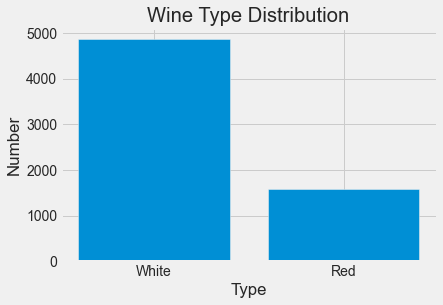

In [41]:
plt.bar(['White','Red'], type_distribution.type)
plt.xlabel("Type")
plt.ylabel("Number")
plt.title("Wine Type Distribution")

## Split the data

In [62]:
# import wine data
wine = pd.read_csv('winequalityN.csv')
red_wine = wine[wine["type"]=="red"]
white_wine = wine[wine["type"]=="white"]
wine.head()
red_wine.head()
le = LabelEncoder()
wine.type = le.fit_transform(wine.type)
wine = wine.dropna()
red_wine = red_wine.dropna()
white_wine = white_wine.dropna()

In [63]:
X = wine.drop('quality', axis=1)
X_red = red_wine.drop(['quality','type'], axis=1)
X_white = white_wine.drop(['quality','type'], axis=1)
y = wine.quality
y_red = red_wine.quality
y_white = white_wine.quality

## Decision Tree

In [42]:
white_X = white_wine.drop(['type','quality','quality2'], axis=1)
white_y = white_wine.quality2
white_y.head(2)

0    1
1    1
Name: quality2, dtype: int32

In [43]:
red_X = red_wine.drop(['type','quality','quality2'], axis=1)
red_y = red_wine.quality2
red_y.head(2)

4898    0
4899    0
Name: quality2, dtype: int32

In [44]:
# White Wine
X_train1, X_test1, y_train1, y_test1 = train_test_split(white_X, white_y, random_state=42)
# Red Wine
X_train0, X_test0, y_train0, y_test0 = train_test_split(red_X, red_y, random_state=42)

In [45]:
# White Wine decision tree tuning
white_tuning = pd.DataFrame(columns=['mn_leaf','mn_sample','accuracy'])
for mn_leaf in np.arange(0.05,0.5,0.05):
    for mn_sample in np.arange(0.05,0.5,0.05):
        tree_clf1 = DecisionTreeClassifier(max_depth=3,min_samples_split=mn_sample,min_samples_leaf=mn_leaf,random_state=42)
        tree_clf1.fit(X_train1, y_train1)
        y_pred1 = tree_clf1.predict(X_test1)
        white_tuning = white_tuning.append({'mn_leaf':mn_leaf,'mn_sample':mn_sample,'accuracy':accuracy_score(y_test1, y_pred1)},
                                      ignore_index=True)
        #print(f"accuracy score: {accuracy_score(y_test0, y_pred0)}\n")
        #print(f"Confusion Matrix: \n {confusion_matrix(y_test0, y_pred0)}\n")
white_tuning.sort_values(by='accuracy',ascending=False)

,mn_leaf,mn_sample,accuracy
0,0.05,0.05,0.747947
10,0.10,0.10,0.747947
15,0.10,0.35,0.747947
14,0.10,0.30,0.747947
13,0.10,0.25,0.747947
...,...,...,...
57,0.35,0.20,0.662562
56,0.35,0.15,0.662562
55,0.35,0.10,0.662562
54,0.35,0.05,0.662562


accuracy score: 0.7479474548440066

Confusion Matrix: 
 [[198 213]
 [ 94 713]]



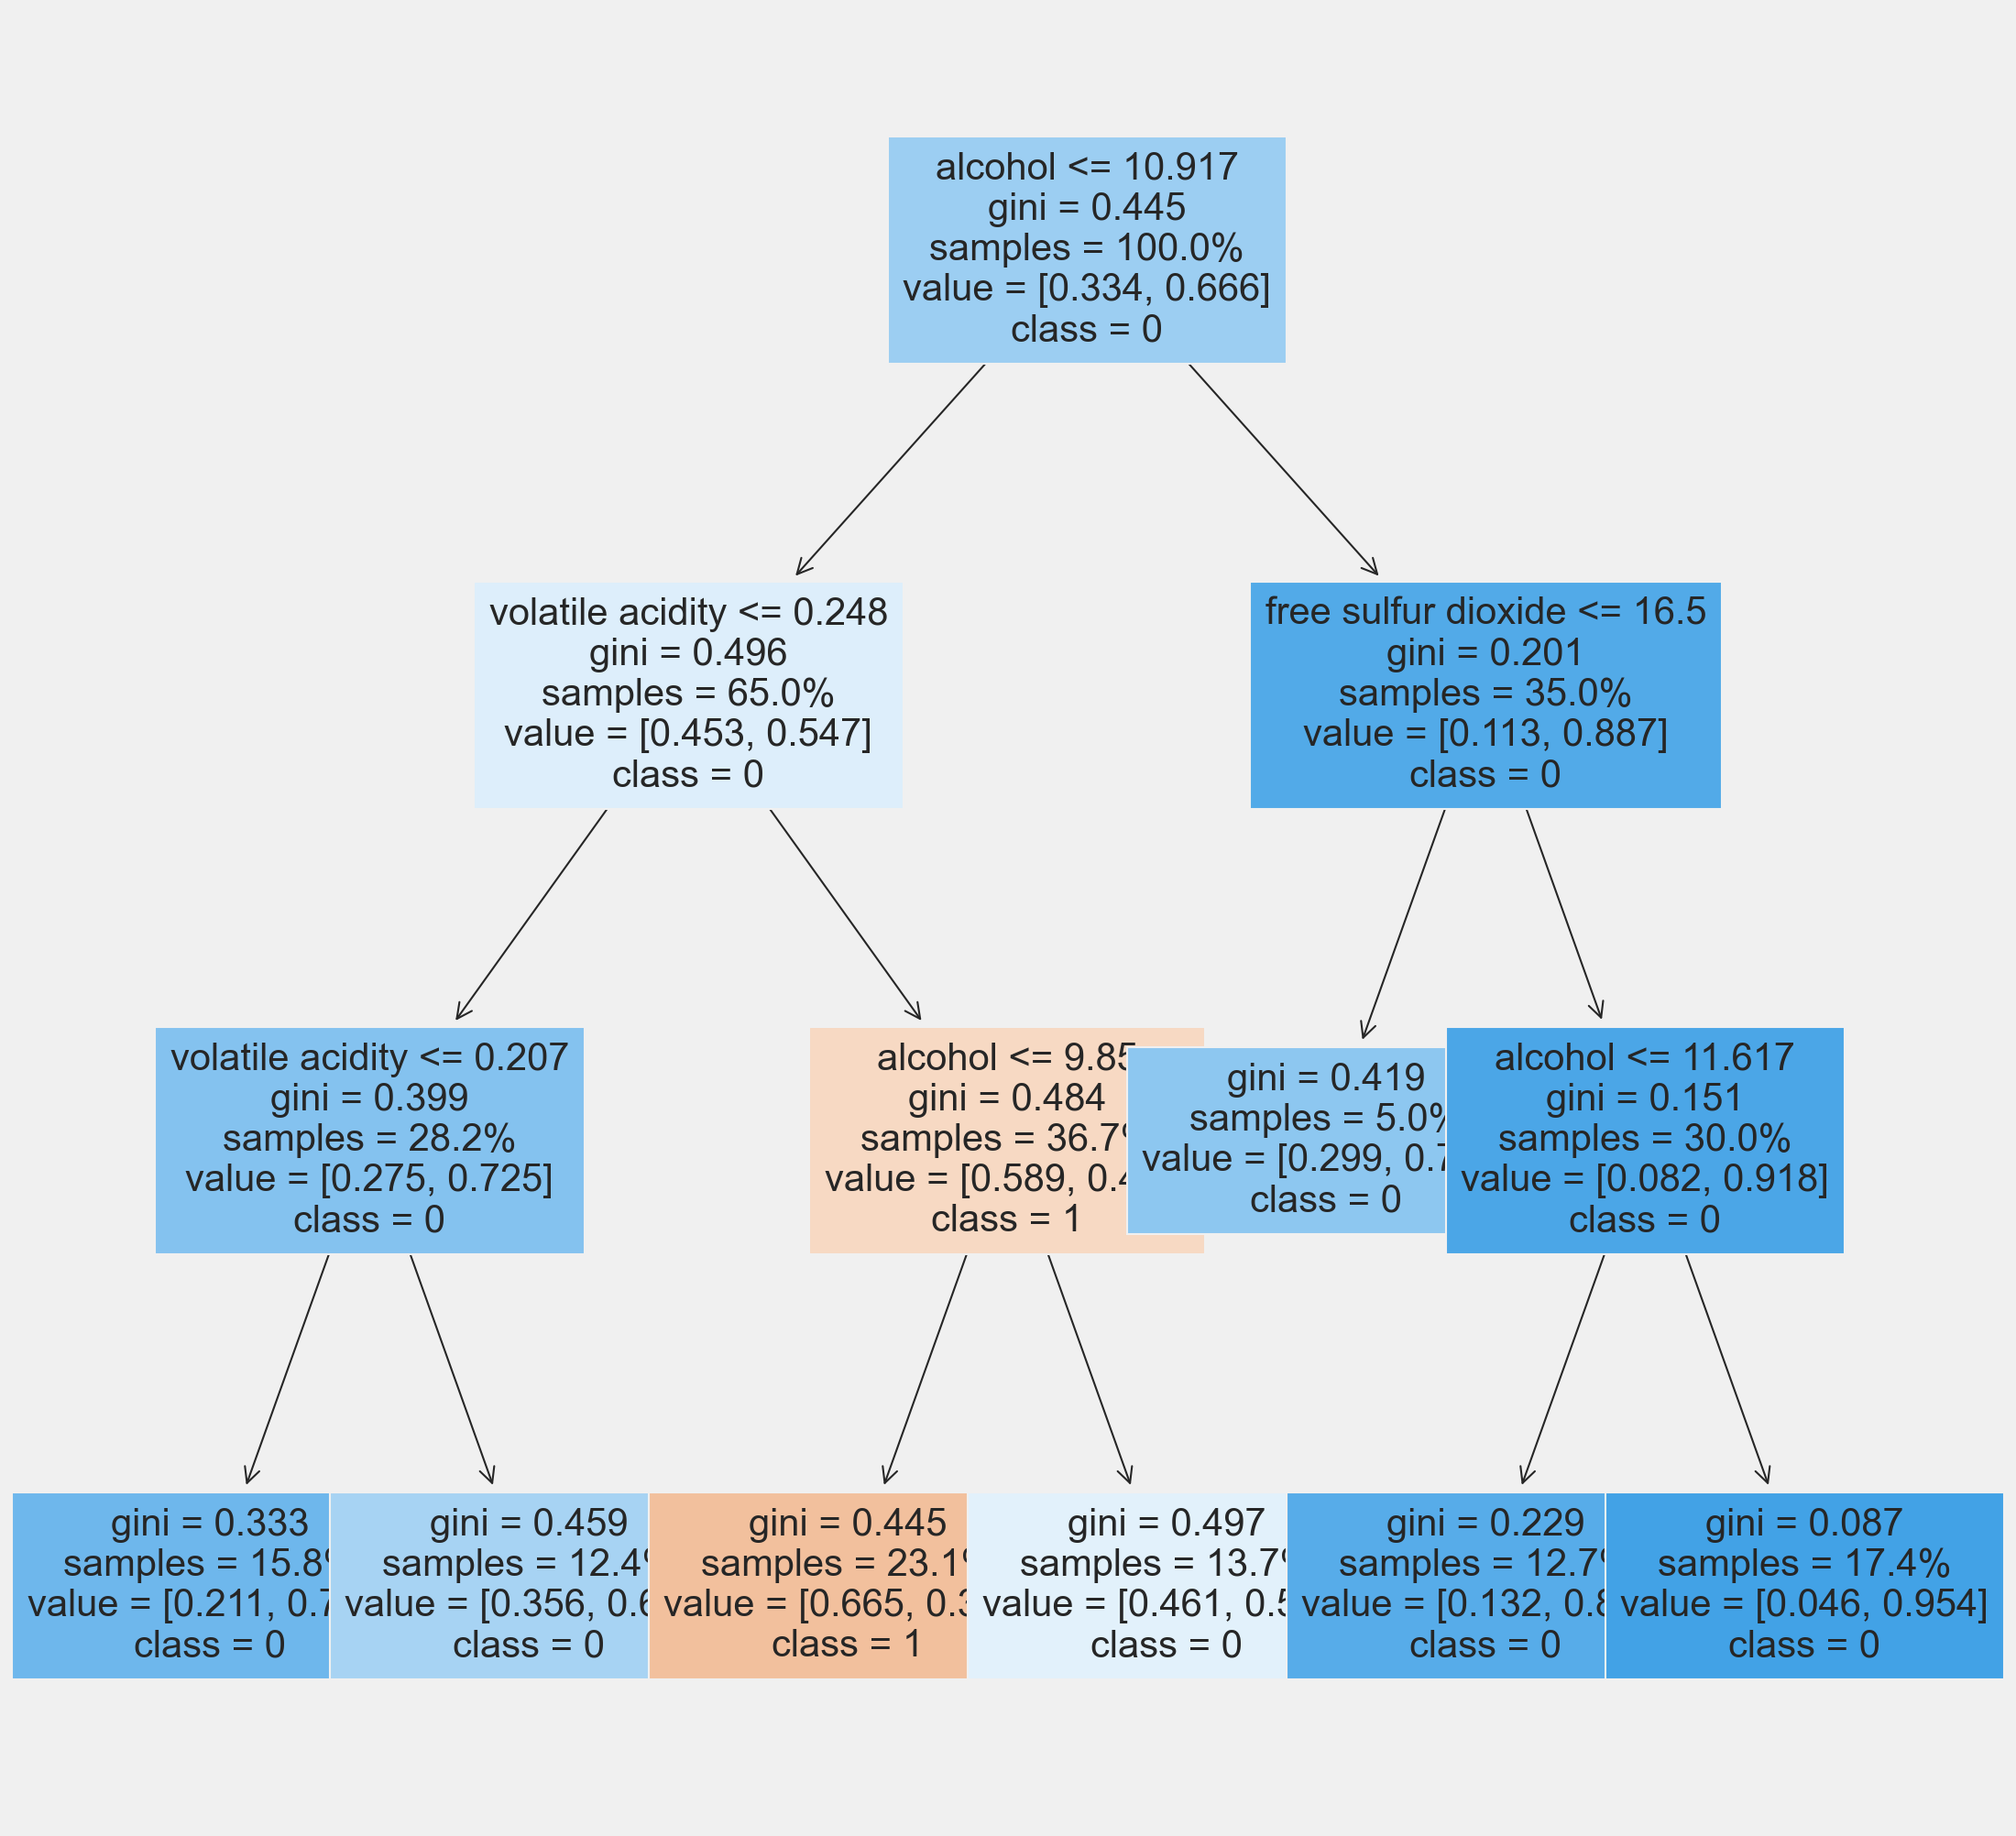

In [46]:
# Decision Tree for White Wine
tree_clf1 = DecisionTreeClassifier(max_depth=3,min_samples_split=0.05,min_samples_leaf=0.05,random_state=42)
tree_clf1.fit(X_train1, y_train1)

y_pred1 = tree_clf1.predict(X_test1)        
print(f"accuracy score: {accuracy_score(y_test1, y_pred1)}\n")
print(f"Confusion Matrix: \n {confusion_matrix(y_test1, y_pred1)}\n")

fn=['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
cn=['1','0']


from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
tree.plot_tree(tree_clf1,
               feature_names = fn, 
               class_names=cn,
               filled = True,proportion=True, fontsize=10);
fig.savefig('DT_white.png')

In [47]:
# Red Wine decision tree tuning
red_tuning = pd.DataFrame(columns=['mn_leaf','mn_sample','accuracy'])
for mn_leaf in np.arange(0.05,0.5,0.05):
    for mn_sample in np.arange(0.05,0.5,0.05):
        tree_clf0 = DecisionTreeClassifier(max_depth=3,min_samples_split=mn_sample,min_samples_leaf=mn_leaf,random_state=42)
        tree_clf0.fit(X_train0, y_train0)
        y_pred0 = tree_clf0.predict(X_test0)
        red_tuning = red_tuning.append({'mn_leaf':mn_leaf,'mn_sample':mn_sample,'accuracy':accuracy_score(y_test0, y_pred0)},
                                      ignore_index=True)
        #print(f"accuracy score: {accuracy_score(y_test0, y_pred0)}\n")
        #print(f"Confusion Matrix: \n {confusion_matrix(y_test0, y_pred0)}\n")
red_tuning.sort_values(by='accuracy',ascending=False)

,mn_leaf,mn_sample,accuracy
10,0.10,0.10,0.706767
9,0.10,0.05,0.706767
13,0.10,0.25,0.706767
12,0.10,0.20,0.706767
11,0.10,0.15,0.706767
...,...,...,...
42,0.25,0.35,0.661654
43,0.25,0.40,0.661654
44,0.25,0.45,0.661654
80,0.45,0.45,0.661654


accuracy score: 0.706766917293233

Confusion Matrix: 
 [[134  45]
 [ 72 148]]



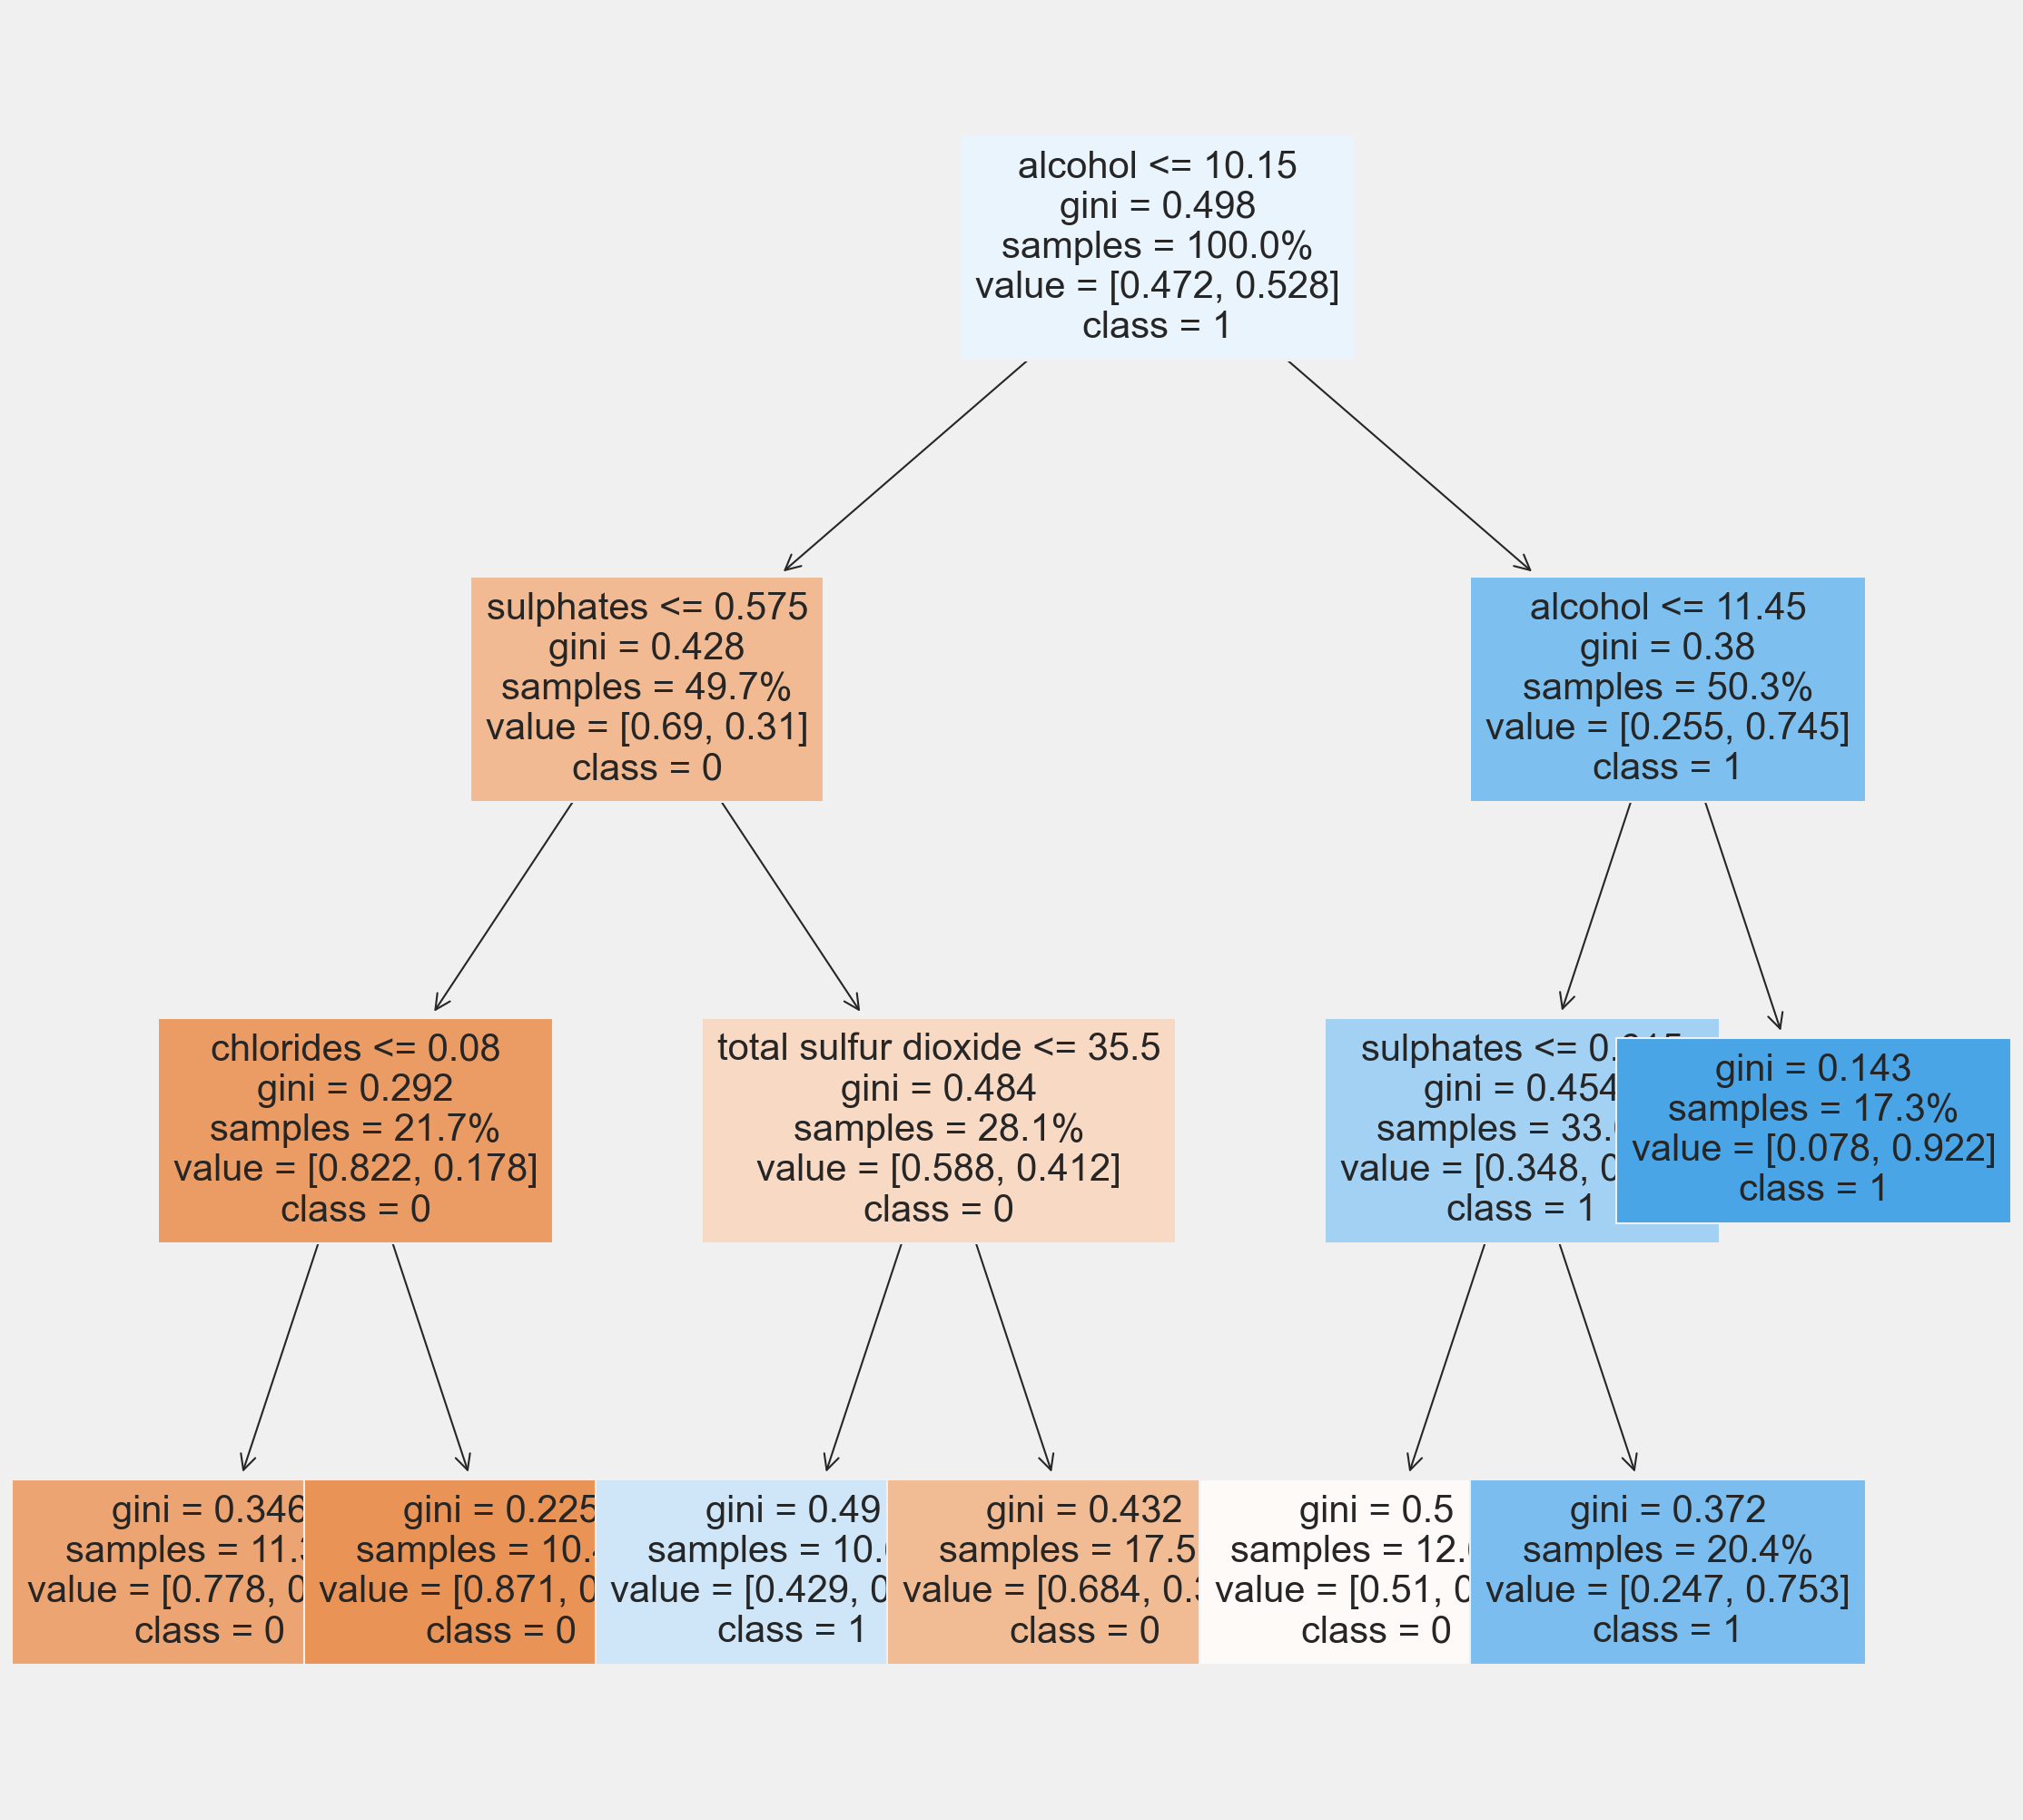

In [48]:
# Red Wine Decision Tree
tree_clf0 = DecisionTreeClassifier(max_depth=3,min_samples_split=0.1,min_samples_leaf=0.1,random_state=42)
tree_clf0.fit(X_train0, y_train0)
y_pred0 = tree_clf0.predict(X_test0)
print(f"accuracy score: {accuracy_score(y_test0, y_pred0)}\n")
print(f"Confusion Matrix: \n {confusion_matrix(y_test0, y_pred0)}\n")
from sklearn import tree
fn=['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
tree.plot_tree(tree_clf0,
               feature_names = fn, 
               class_names=cn,
               filled = True,proportion=True,fontsize=10);
fig.savefig('DT_red.png')

### Standard Scaler for knn

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_red = scaler.fit_transform(X_red)
X_white = scaler.fit_transform(X_white)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, random_state=666)
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, random_state=666)

### KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

In [66]:
knn_clf_red = knn_clf.fit(X_red_train, y_red_train)
y_red_pred = knn_clf.predict(X_red_test)

knn_clf_white = knn_clf.fit(X_white_train, y_white_train)
y_white_pred = knn_clf.predict(X_white_test)

In [67]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
accuracy_red = accuracy_score(y_red_test, y_red_pred)
print(accuracy_red)
accuracy_white = accuracy_score(y_white_test, y_white_pred)
print(accuracy_white)

0.567450495049505
0.5488721804511278
0.5459770114942529


In [68]:
confusion_matrix(y_test, y_pred)

array([[  1,   1,   3,   4,   0,   0],
       [  0,   9,  33,  19,   2,   0],
       [  0,  10, 332, 170,  11,   3],
       [  0,   5, 192, 453,  65,   2],
       [  0,   0,  24, 121, 117,   2],
       [  0,   0,   1,   9,  22,   5]], dtype=int64)

<Figure size 432x288 with 0 Axes>

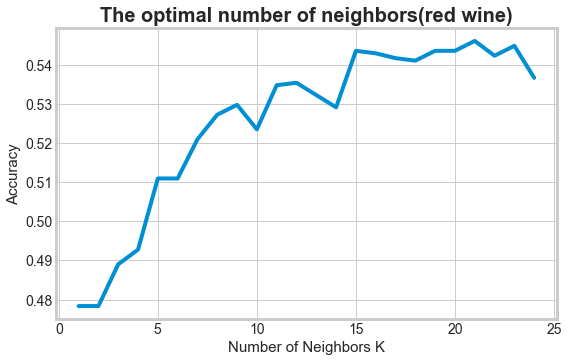

In [69]:
# red wine
from sklearn.model_selection import cross_val_score
# creating a list of K for KNN
#The model will consider K values from 1 till 30 with an interval of 2 (All odd numbers from 1 till 30)
k_list = list(range(1,25))

# Creating list of Average Accuracy for each Cross-validation
cv_scores = []

# Performing 7-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k,p=2, weights='distance')
    scores = cross_val_score(knn, X_red, y_red, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# Plotting average Accuracy for all number of neighbors

plt.figure()
plt.figure(figsize=(8,5))
plt.title('The optimal number of neighbors(red wine)', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")

plt.plot(k_list, cv_scores)
plt.show()

<Figure size 432x288 with 0 Axes>

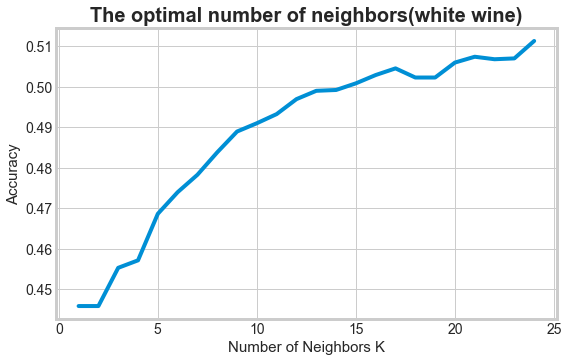

In [70]:
# white wine
from sklearn.model_selection import cross_val_score
# creating a list of K for KNN
#The model will consider K values from 1 till 30 with an interval of 2 (All odd numbers from 1 till 30)
k_list = list(range(1,25))

# Creating list of Average Accuracy for each Cross-validation
cv_scores = []

# Performing 7-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, p=2, weights='distance')
    scores = cross_val_score(knn, X_white, y_white, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# Plotting average Accuracy for all number of neighbors

plt.figure()
plt.figure(figsize=(8,5))
plt.title('The optimal number of neighbors(white wine)', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")

plt.plot(k_list, cv_scores)
plt.show()

### Grid Search of KNN

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = [
    {
        'weights': ['distance', 'uniform'],
        'n_neighbors': [i for i in range(1, 11)], 
        'p': [i for i in range(1, 6)]
    }
]

In [72]:
knn_gs = KNeighborsClassifier()

In [73]:
grid_search = GridSearchCV(knn_gs, param_grid, n_jobs=1, verbose=1)

In [74]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5],
                          'weights': ['distance', 'uniform']}],
             verbose=1)

In [75]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')

In [76]:
grid_search.best_score_

0.6453484833976998

In [77]:
knn_clf = KNeighborsClassifier(n_neighbors=10, p=1, weights="distance")
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

knn_clf_red = knn_clf.fit(X_red_train, y_red_train)
y_red_pred = knn_clf.predict(X_red_test)

knn_clf_white = knn_clf.fit(X_white_train, y_white_train)
y_white_pred = knn_clf.predict(X_white_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
accuracy_red = accuracy_score(y_red_test, y_red_pred)
print(accuracy_red)
accuracy_white = accuracy_score(y_white_test, y_white_pred)
print(accuracy_white)

0.655940594059406
0.6516290726817042
0.6633825944170771


### SVM

In [78]:
# data cleaning
wine = pd.read_csv('winequalityN.csv')
red_wine = wine[wine["type"]=="red"]
white_wine = wine[wine["type"]=="white"]

le = LabelEncoder()
wine.type = le.fit_transform(wine.type)

wine = wine.dropna()
red_wine = red_wine.dropna()
white_wine = white_wine.dropna()

X = wine.drop('quality', axis=1)
X_red = red_wine.drop(['quality','type'], axis=1)
X_white = white_wine.drop(['quality','type'], axis=1)

y = wine.quality
y_red = red_wine.quality
y_white = white_wine.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, random_state=666)
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, random_state=666)

In [79]:
from sklearn import svm
svm_clf = svm.SVC(random_state=666)
svm_clf = svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
accuracy_score(y_test, y_pred_svm)

0.43626237623762376

### Grid Search of SVM 

In [80]:
param_grid_svm_ran = [
    {
        'C': [i for i in range(1, 10)],
        'gamma': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
    }
]
svm_gs = svm.SVC()
grid_ransearch_svm = RandomizedSearchCV(svm_gs, param_grid_svm_ran, n_jobs=1, verbose=2)


In [81]:
# may cost a few minutes
%%time
grid_ransearch_svm.fit(X_train, y_train)

UsageError: Line magic function `%%time` not found.


In [82]:
print(grid_ransearch_svm.best_estimator_)
print(grid_ransearch_svm.best_score_)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [83]:
# using best combination
svm_clf = svm.SVC(C=7, gamma=0.8,random_state=666)
svm_clf = svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
accuracy_score(y_test, y_pred_svm)

0.6033415841584159

In [84]:
# red wine SVM
svm_clf_red = svm.SVC(C=7, gamma=0.8,random_state=666)
svm_clf_red = svm_clf.fit(X_red_train, y_red_train)
y_pred_svm_red = svm_clf.predict(X_red_test)
accuracy_score(y_red_test, y_pred_svm_red)

0.5989974937343359

In [85]:
# white wine SVM
svm_clf_white = svm.SVC(C=7, gamma=0.8,random_state=666)
svm_clf_white = svm_clf.fit(X_white_train, y_white_train)
y_pred_svm_white = svm_clf.predict(X_white_test)
accuracy_score(y_white_test, y_pred_svm_white)

0.625615763546798

### Logistic Regression

In [86]:
#Red wine
wine_red = wine[wine['type'] == 0]
X = wine_red.drop(['quality','type'], axis=1)
y = wine_red.quality
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [87]:
#Feature selection
logreg = LogisticRegression()
selector = RFECV(logreg, step=1, cv=5, scoring="accuracy")
selector = selector.fit(X_train, y_train)
selector.support_

C:\Users\yxlin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yxlin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([False,  True,  True,  True, False, False, False,  True,  True,
        True,  True])

Text(0, 0.5, 'Accuracy')

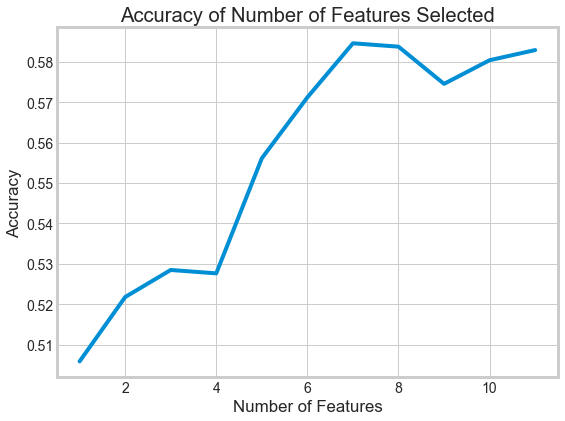

In [88]:
#Selected features for logistic model
features = X_train.columns[selector.support_]
X_train = X_train[features]
accuracy_step = selector.grid_scores_
plt.figure(figsize = (8,6))
plt.plot(range(1,len(accuracy_step)+1),accuracy_step)
plt.title("Accuracy of Number of Features Selected")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")

In [89]:
X_train = X_train[features]
X_test = X_test[features]
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

C:\Users\yxlin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[  0,   0,   5,   0,   0,   0],
       [  0,   0,   3,   1,   0,   0],
       [  0,   0, 110,  52,   1,   0],
       [  0,   0,  61,  97,  11,   0],
       [  0,   0,   3,  40,  11,   0],
       [  0,   0,   0,   0,   4,   0]], dtype=int64)

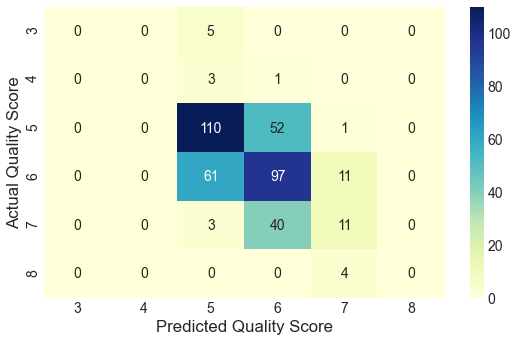

In [90]:
conf_matrix = pd.DataFrame(data=cm,columns=[np.unique(y_test)],index=[np.unique(y_test)])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap="YlGnBu")
plt.xlabel("Predicted Quality Score")
plt.ylabel("Actual Quality Score")
plt.show()

In [91]:
accuracy_score(y_test, y_pred)

0.5463659147869674

In [92]:
coef = logreg.coef_
intercept = logreg.intercept_
logreg_model = pd.DataFrame (data = coef, columns = features, index = np.array(range(3,9)))
logreg_model.insert(value = intercept, column = 'Intercept', loc=0)
logreg_model.columns.name = 'Quality Class'
logreg_model

Quality Class,Intercept,volatile acidity,citric acid,residual sugar,density,pH,sulphates,alcohol
3,0.033244,0.563675,-0.170405,0.256757,0.037238,0.314949,-0.070682,-0.412097
4,-0.084062,2.573934,-1.276676,0.228189,-0.085656,0.987631,-0.838179,-0.439525
5,2.091419,1.582868,1.322652,0.090944,1.592662,1.724723,-1.519426,-0.745178
6,-0.128432,-1.559105,-0.594266,0.032784,-0.073376,0.648227,0.492180,0.074018
7,-1.159448,-2.520159,0.388946,0.038269,-0.844226,-1.587383,1.729522,0.734233
8,-0.752720,-0.641214,0.329748,-0.646943,-0.626642,-2.088147,0.206586,0.788549


In [93]:
#White wine
wine_white = wine[wine['type'] == 1]
X = wine_white.drop(['quality','type'], axis=1)
y = wine_white.quality
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [94]:
#Feature selection
logreg = LogisticRegression()
selector = RFECV(logreg, step=1, cv=5, scoring="accuracy")
selector = selector.fit(X_train, y_train)
selector.support_

C:\Users\yxlin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yxlin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([ True,  True, False,  True, False, False, False, False,  True,
       False,  True])

Text(0, 0.5, 'Accuracy')

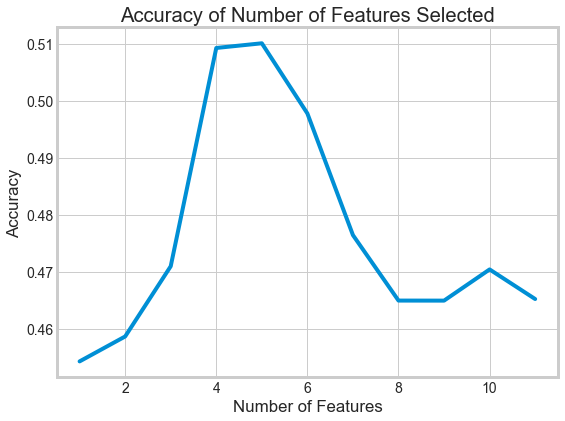

In [95]:
#Selected features for logistic model
features = X_train.columns[selector.support_]
X_train = X_train[features]
accuracy_step = selector.grid_scores_
plt.figure(figsize = (8,6))
plt.plot(range(1,len(accuracy_step)+1),accuracy_step)
plt.title("Accuracy of Number of Features Selected")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")

C:\Users\yxlin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


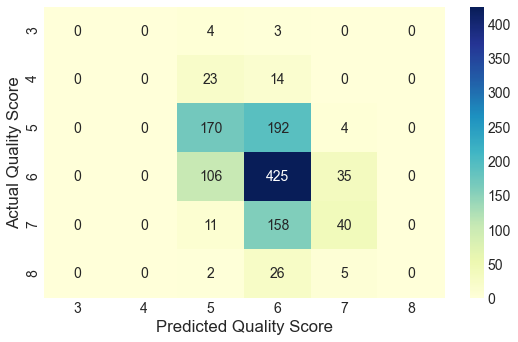

In [96]:
X_train = X_train[features]
X_test = X_test[features]
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=[np.unique(y_test)],index=[np.unique(y_test)])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap="YlGnBu")
plt.xlabel("Predicted Quality Score")
plt.ylabel("Actual Quality Score")
plt.show()

In [97]:
accuracy_score(y_test, y_pred)

0.5213464696223317

In [98]:
coef = logreg.coef_
intercept = logreg.intercept_
logreg_model2 = pd.DataFrame (data = coef, columns = features, index = np.array(range(3,10)))
logreg_model2.insert(value = intercept, column = 'Intercept', loc=0)
logreg_model2.columns.name = 'Quality Class'
logreg_model2

Quality Class,Intercept,fixed acidity,volatile acidity,residual sugar,pH,alcohol
3,-0.070144,0.386914,0.048310,0.029750,-0.222202,-0.418948
4,0.115506,0.185969,1.353861,-0.089946,0.557084,-0.285455
5,1.126068,0.302942,2.189072,0.004896,1.690385,-0.686969
6,0.115204,0.048158,-1.873835,0.048083,0.445041,0.097477
7,-0.736891,-0.236362,-1.448920,0.052832,-0.890404,0.643575
8,-0.467728,-0.501128,-0.260133,0.071021,-1.375825,0.732025
9,-0.082014,-0.186493,-0.008355,-0.116637,-0.204079,-0.081704


### Logistic Regression - Binary (low/high quality)

In [99]:
wine['quality2'] = np.where(wine['quality']>= 6, 1, 0)
wine.head(15)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality2
0,1,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,1,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,1,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,1,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
5,1,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
6,1,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1
7,1,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
8,1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
9,1,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,1


In [100]:
#Red wine
wine_red = wine[wine['type'] == 0]
X = wine_red.drop(['quality','quality2','type'], axis=1)
y = wine_red.quality2
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
logreg = LogisticRegression()
selector = RFECV(logreg, step=1, cv=5, scoring="accuracy")
selector = selector.fit(X_train, y_train)
selector.support_

C:\Users\yxlin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yxlin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

Text(0, 0.5, 'Accuracy')

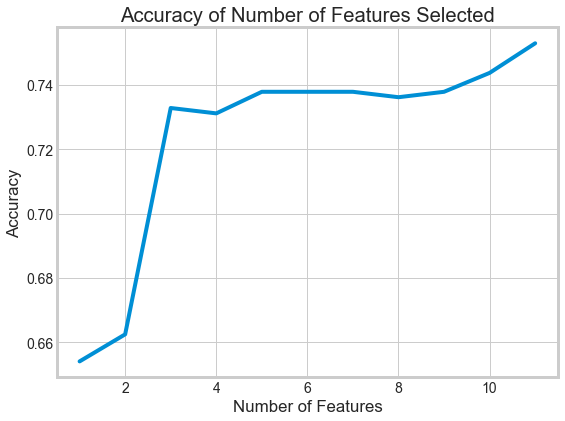

In [101]:
#Selected features for logistic model
features = X_train.columns[selector.support_]
X_train = X_train[features]
accuracy_step = selector.grid_scores_
plt.figure(figsize = (8,6))
plt.plot(range(1,len(accuracy_step)+1),accuracy_step)
plt.title("Accuracy of Number of Features Selected")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")

C:\Users\yxlin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


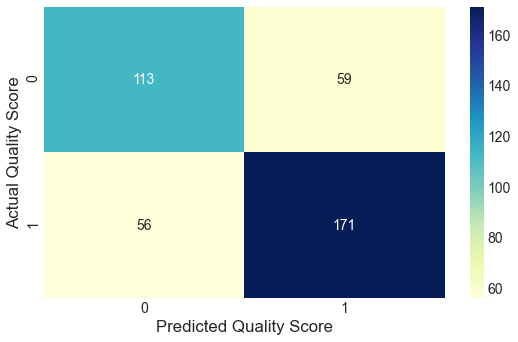

In [102]:
X_train = X_train[features]
X_test = X_test[features]
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=[np.unique(y_test)],index=[np.unique(y_test)])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap="YlGnBu")
plt.xlabel("Predicted Quality Score")
plt.ylabel("Actual Quality Score")
plt.show()

In [103]:
accuracy_score(y_test, y_pred)

0.7117794486215538

In [104]:
coef = logreg.coef_
intercept = logreg.intercept_
logreg_model = pd.DataFrame (data = coef, columns = features)
logreg_model.insert(value = intercept, column = 'Intercept', loc=0)
logreg_model

,Intercept,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.691965,-0.007702,-3.219553,-0.981733,-0.008618,-1.147692,0.024588,-0.017166,-1.051082,-1.562752,2.123602,0.891825


In [105]:
#White wine
wine_white = wine[wine['type'] == 1]
X = wine_white.drop(['quality','quality2','type'], axis=1)
y = wine_white.quality2
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
logreg = LogisticRegression()
selector = RFECV(logreg, step=1, cv=5, scoring="accuracy")
selector = selector.fit(X_train, y_train)
selector.support_

C:\Users\yxlin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yxlin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([ True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True])

Text(0, 0.5, 'Accuracy')

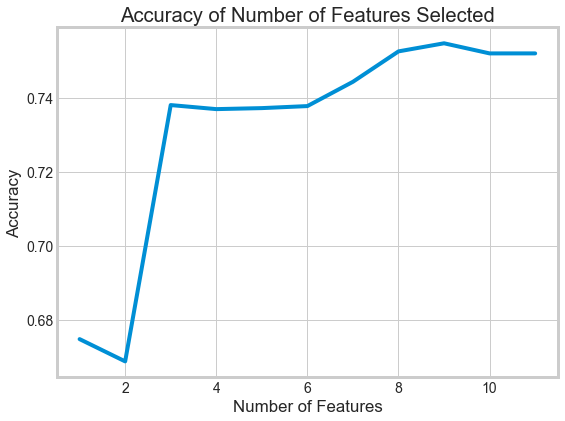

In [106]:
#Selected features for logistic model
features = X_train.columns[selector.support_]
X_train = X_train[features]
accuracy_step = selector.grid_scores_
plt.figure(figsize = (8,6))
plt.plot(range(1,len(accuracy_step)+1),accuracy_step)
plt.title("Accuracy of Number of Features Selected")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")

C:\Users\yxlin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


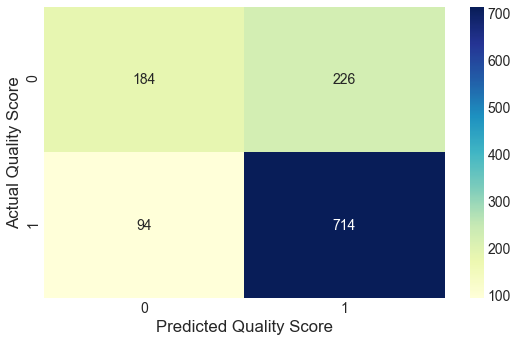

In [107]:
X_train = X_train[features]
X_test = X_test[features]
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=[np.unique(y_test)],index=[np.unique(y_test)])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap="YlGnBu")
plt.xlabel("Predicted Quality Score")
plt.ylabel("Actual Quality Score")
plt.show()

In [108]:
accuracy_score(y_test, y_pred)

0.7372742200328407

In [109]:
coef = logreg.coef_
intercept = logreg.intercept_
logreg_model = pd.DataFrame (data = coef, columns = features)
logreg_model.insert(value = intercept, column = 'Intercept', loc=0)
logreg_model

,Intercept,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol
0,-5.83075,-0.165703,-5.561459,-0.379904,0.075409,-0.320388,-2.09362,0.00296,1.425272,0.99322
